In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Deterministic Time Series Models II

## Nonlinear First-Order Difference Equations

Recall the Solow growth model with no exogenous productivity growth (written in "per worker" terms):

\begin{align}
y_t & = Ak_t^{\alpha}\\
k_{t+1} & = i_t + (1-\delta)k_{t}\\
y_t & = c_t + i_t\\
c_t & = (1-s)y_t,
\end{align}

where $y_t$ is output per worker, $k_t$ is capital per worker, $c_t$ is consumption per worker, and $i_t$ is investment per worker. We've seen that by treating investment as an exogenous quantity, then the capital accumulation equation could be viewed as a linear first-order difference equation. But in the Solow model, investment is *not* exogenous and is equal to the savings rate times output per worker:

\begin{align}
i_t & = sy_t = sAk_t^{\alpha}
\end{align}

Therefore the equilibrium law of motion for capital per worker is:

\begin{align}
k_{t+1} & = sAk_t^{\alpha} + (1-\delta)k_{t}, \label{eqn:capital_solution}
\end{align}

which is a *nonlinear* first-order difference equation. In equilibrium capital in period $t+1$ is a *concave* (i.e., increasing at a decreasing rate) function of capital in period $t$. We can iterate on the nonlinear law of motion just like we iterated on the linear difference equation.

Let's suppose the following values for the simulation:

| $k_0$ | $s$ | $A$  | $\alpha$ | $\delta$  | $T$  |
|-------|-----|------|----------|-----------|------|
| 10    | 0.1 | 10   | 0.35     |  0.1      | 101  |

Where $T$ is the total number of simulation periods (i.e., $t$ will range from $0$ to $100$).

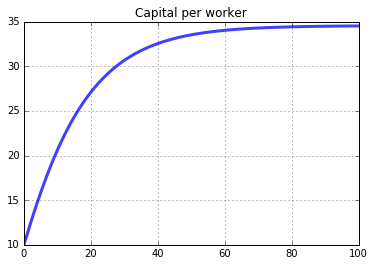

In [2]:
# Create variables 'k0', 's', 'A', 'alpha','delta','T' to store parameter values for the simulation
k0 = 10
s = 0.1
A = 10
alpha = 0.35
delta = 0.1
T = 101

# Initialize capital per worker variable 'capital' as an array of zeros with length T
capital = np.zeros(T)

# Set first value of capital equal to k0
capital[0] = k0

# Iterate over t in range(T-1) to update subsequent values in the capital array
for t in range(T-1):
    capital[t+1] = s*A*capital[t]**alpha + (1-delta)*capital[t]

# Construct a plot of simulated capital per worker
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(capital,lw=3,alpha=0.75)
ax.set_title('Capital per worker')
ax.grid()

It looks like capital per worker is converging toward a steady state value near $35$. You can verify that the steady state is in fact $34.55$. 

So computing nonlinear difference equations is essentially the same as computing linear differrence equations. However, establishing the stability properties of nonlinear difference equations is more involved and we'll skip that. But in case you're interested, I've included an optional discussion at the bottom of this notebook.

## Systems of Difference Equations

Most macroeconomic models are dynamic *systems* of equations. They are collections of several equations that simultaneously determine several variables. Working with them can be a little intimidating, but in principle, it's similar to working with a single dynamic equation.

### Example: Solow Growth Model Without Exogenous Growth

The basic Solow growth model is a system of four equations that determine values of four variables $k_t$, $y_t$, $c_t$, and $i_t$. In the Solow model, capital per worker is *state variable* because the the value of $k_t$ was actually determined in period $t-1$. In fact, in the Solow model without exogenous population of productivity growth, capital is the *only* state variable. That means that if you know the value of capital per worker, then you can compute all of the other quantities. The nonstate variables are called *control* variables.

to make this point clear, here is the Solow growth model *solved* in terms of $k_t$:

\begin{align}
y_t & = Ak_t^{\alpha}\\
i_t & = sAk_t^{\alpha}\\
c_t & = (1-s)Ak_t^{\alpha}\\
k_{t+1} & = sAk_t^{\alpha} + (1-\delta)k_{t}.
\end{align}

To simulate all of the endogenous variables, do these two steps:

1. Simulate an array of values for $k_t$
2. Compute the other variables using the array of $k_t$ values.

Since we've already simulated capital, we can just compute simulated values for $y_t$, $c_t$, and $i_t$ right away.

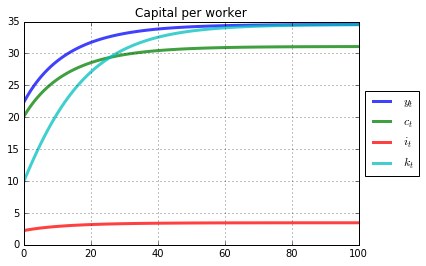

In [3]:
# Create variables 'output', 'consumption', and 'investment' equal to the respective variables in the model
output = A*capital**alpha
consumption = (1-s)*output
investment = s*output

# Construct a plot of simulated output per worker, consumption per worker, investment per worker, capital per worker.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(output,lw=3,alpha=0.75,label = '$y_t$')
ax.plot(consumption,lw=3,alpha=0.75,label = '$c_t$')
ax.plot(investment,lw=3,alpha=0.75,label = '$i_t$')
ax.plot(capital,lw=3,alpha=0.75,label = '$k_t$')
ax.set_title('Capital per worker')

# Create legend. Use ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) to put legend outside of axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add grid if you want
ax.grid()

Of course, if we want to compute multiple simulations, then we will want to write a function to compute the simulated values so that we don't have to repeat ourselves. The function in the following cell returns a `DataFrame` with columns containing simulated values of capital per worker, output per worker, consumption per worker, and investment per worker.

In [4]:
# Define a function that returns a DataFrame of simulated value from the Solow model with no exogenous growth. CELL PROVIDED
def solow_no_exo_growth(s,A,alpha,delta,T,k0):
    
    '''Function for computing a simulation of the Solow growth model without exogenous growth.
    
    The model is assmed to be in "per-worker" quantities:
    
            y[t]   = A*k[t]^alpha
            k[t+1] = i[t] + (1-delta)*k[t]
            y[t]   = c[t] + i[t]
            c[t]   = (1-s)*y[t]
    
    Args:
        s (float):      Saving rate
        A (float):      TFP
        alpha (float):  Capital share in Cobb-Dougla production function
        delta (float):  Capital depreciation rate
        T (int):        Number of periods to simulate
        k0 (float):     Initial value of capital per worker

     
     Returns:
         Pandas DataFrame
     '''
    
    # Initialize capital per worker values
    capital = np.zeros(T)

    # Set first value of capital per worker equal to k0
    capital[0] = k0

    # Iterate over t in range(T-1) to update subsequent values in the capital array
    for t in range(T-1):
        capital[t+1] = s*A*capital[t]**alpha + (1-delta)*capital[t]
    
    # Compute the values of the other variables
    output = A*capital**alpha
    consumption = (1-s)*output
    investment = s*output
    
    # Put simulated data into a DataFrame
    df = pd.DataFrame({'output':output,'consumption':consumption,'investment':investment,'capital':capital})
    
    # Return the simulated data
    return df

Use the function `solow_no_exo_growth()` to simulate the Solow model with the same parameters that we've been using.

In [5]:
# Simulate the model and store results in a variable called 'df'
df =  solow_no_exo_growth(s,A,alpha,delta,T,k0)

# Print the first five rows of df
print(df.head())

      output  consumption  investment    capital
0  22.387211    20.148490    2.238721  10.000000
1  23.321201    20.989081    2.332120  11.238721
2  24.169756    21.752780    2.416976  12.446969
3  24.943282    22.448954    2.494328  13.619248
4  25.650405    23.085364    2.565040  14.751651


Now, use the function `solow_no_exo_growth()` to simulte the model for five different initial values of capital per worker: $k_0 = 10, 20, 30, 40, 50$. Plot the trajectories for $y_t$ together.

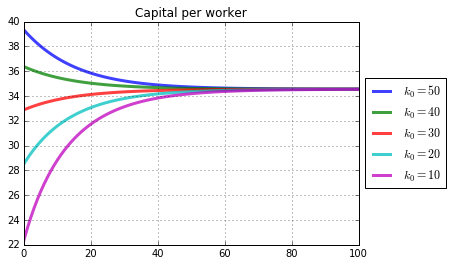

In [6]:
# Create variable 'initial_ks' that store the five initial values of k[t]
initial_ks = [50,40,30,20,10]

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Iterate over k0 in initial_ks and plot
for k0 in initial_ks:
    df = solow_no_exo_growth(s,A,alpha,delta,T,k0)
    ax.plot(df.output,lw=3,alpha=0.75,label='$k_0='+str(k0)+'$')

# Add title
ax.set_title('Capital per worker')

# Create legend. Use ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) to put legend outside of axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add grid if you want
ax.grid()

### Solow Model with Exogenous Labor

Now consider the Solow growth model with exogenous labor growth. That is, let $L_t$ denote the quantity of labor and suppose that the population (and therefore the labor supply) grows at the constant rate $n$. This means:

\begin{align}
L_{t+1} & = (1+n)L_t,
\end{align}

where the intial value of labor $L_0$ must be given. The rest of the model in aggregate terms is:

\begin{align}
Y_t & = AK_t^{\alpha}L_t^{1-\alpha}\\
K_{t+1} & = I_t + (1-\delta)K_{t}\\
Y_t & = C_t + I_t\\
C_t & = (1-s)Y_t,
\end{align}

where the intial value of capital $K_0$ is also given.

Since capital *and* labor are both determined in the previous period by their respective laws of motion, the Solow model with exogenous labor growth has *two* state variables: $K_t$ and $L_t$. We can solve the capital law of motion for capital in terms of only the variables capital and labor and so the two equations that determine how the state of the economy evolves are:

\begin{align}
K_{t+1} & = sAK_t^{\alpha}L_t^{1-\alpha} + (1-\delta)K_{t}\\
L_{t+1} & = (1+n)L_t
\end{align}

If we iterate on these two to compute simulations of $K_t$ and $L_t$, then we can compute $Y_t$, $C_t$, and $I_t$ easily.

Let's suppose the following values for a simulation:

| $L_0$ | $n$  | $K_0$ | $s$  | $A$  | $\alpha$ | $\delta $ | $T$ |
|-------|------|-------|------|------|----------|-----------|-----|
| 1     | 0.01 | 10    | 0.1  | 10   | 0.35     | 0.1       | 101 |

Compute simulated values for $K_t$ and $L_t$ and use those values to compute and plot simulated series for output $Y_t$ and output *per worker* $Y_t/L_t$ side-by-side in the same figure.

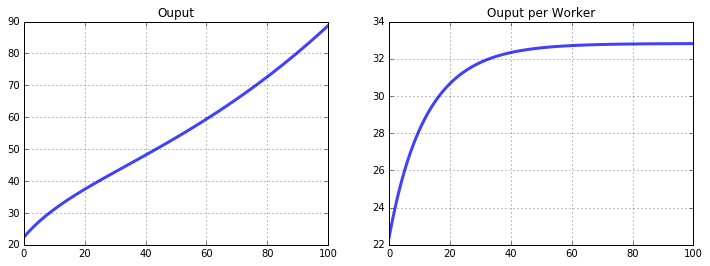

In [7]:
# Create variables 'K0', 'L0', 'n', 's', 'A', 'alpha','delta','T' to store parameter values for the simulation
K0 = 10
L0 = 1
n = 0.01
s = 0.1
A = 10
alpha = 0.35
delta = 0.1
T = 101

# Initialize capital variable 'capital' as an array of zeros with length T
capital = np.zeros(T)

# Set first value of capital equal to Kdd0
capital[0] = K0

# Initialize the labor variable 'labor' as an array of zeros with length T
labor = np.zeros(T)

# Set first value of capital equal to L0
labor[0] = L0

# Iterate over t in range(T-1) to update subsequent values in the capital and labor arrays
for t in range(T-1):
    capital[t+1] = s*A*capital[t]**alpha*labor[t]**(1-alpha) + (1-delta)*capital[t]
    labor[t+1] = (1+n)*labor[t]

# Create variables 'output' and 'output_pw' that store output and output per worker
output = A*capital**alpha*labor**(1-alpha)
output_pw = output/labor

# Create figure
fig = plt.figure(figsize=(12,4))

# Construct a plot of simulated output
ax = fig.add_subplot(1,2,1)
ax.plot(output,lw=3,alpha=0.75)
ax.set_title('Ouput')
ax.grid()

# Construct a plot of simulated output per worker
ax = fig.add_subplot(1,2,2)
ax.plot(output_pw,lw=3,alpha=0.75)
ax.set_title('Ouput per Worker')
ax.grid()

Because of exogenous labor growth, there is long-run growth in output but not output per worker. The function in the cell below simulates the Solow model with exogenous labor growth.

In [8]:
# Define a function that returns a DataFrame of simulated value from the Solow model with exogenous labor growth. CELL PROVIDED
def solow_no_exo_growth(s,A,alpha,delta,n,T,K0,L0):
    
    '''Function for computing a simulation of the Solow growth model with exogenous labor and TFP growth.
    
            Y[t]   = A*K[t]^alpha*L[t]^(1-alpha)
            K[t+1] = I[t] + (1-delta)*K[t]
            Y[t]   = C[t] + I[t]
            C[t]   = (1-s)*Y[t]
            L[t+1] = (1+n)*L[t]
    
    Args:
        s (float):      Saving rate
        A (float):      TFP
        alpha (float):  Capital share in Cobb-Douglas production function
        delta (float):  Capital depreciation rate
        n (float):      Labor growth rate
        T (int):        Number of periods to simulate
        k0 (float):     Initial value of capital per worker
        L0 (float):     Initial labor
     
     Returns:
         Pandas DataFrame
     '''
    
    # Initialize capital values
    capital = np.zeros(T)

    # Set first value of capital equal to K0
    capital[0] = K0
    
    # Initialize labor values
    labor = np.zeros(T)

    # Set first value of labor equal to L0
    labor[0] = L0

    # Iterate over t in range(T-1) to update subsequent values in the capital and labor arrays
    for t in range(T-1):
        capital[t+1] = s*A*capital[t]**alpha*labor[t]**(1-alpha) + (1-delta)*capital[t]
        labor[t+1] = (1+n)*labor[t]
    
    # Compute the values of the other aggregate variables
    output = A*capital**alpha*labor**(1-alpha)
    consumption = (1-s)*output
    investment = s*output
    
    # Compute the values of the "per worker" variables
    capital_pw = capital/labor
    output_pw = output/labor
    consumption_pw = consumption/labor
    investment_pw = investment/labor
    
    # Put simulated data into a DataFrame
    df = pd.DataFrame({'output':output,
                       'consumption':consumption,
                       'investment':investment,
                       'capital':capital,
                       'output_pw':output_pw,
                       'consumption_pw':consumption_pw,
                       'investment_pw':investment_pw,
                       'capital_pw':capital_pw})
    
    # Return the simulated data
    return df

Use the function `solow_no_exo_growth()` to replicate the previous simulation and plots.

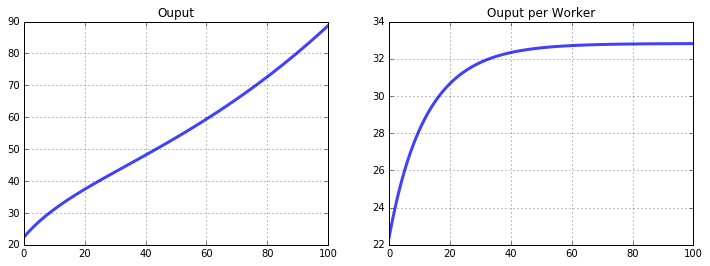

In [9]:
# Replicate the previous simulation exercise using the solow_no_exo_growth() function. CELL PROVIDED

# Simulate the model
df = solow_no_exo_growth(s,A,alpha,delta,n,T,K0,L0)

# Create a figure
fig = plt.figure(figsize=(12,4))

# Construct a plot of simulated output
ax = fig.add_subplot(1,2,1)
ax.plot(df['output'],lw=3,alpha=0.75)
ax.set_title('Ouput')
ax.grid()

# Construct a plot of simulated output per worker
ax = fig.add_subplot(1,2,2)
ax.plot(df['output_pw'],lw=3,alpha=0.75)
ax.set_title('Ouput per Worker')
ax.grid()

## Stability of Nonlinear First-Order Difference Equations (Optional)

Unlike the linear first-order difference equation, stability (i.e., whether the process diverges to infinity in absolute value) of nonlinear first-order difference equations is less straightforward to establish. In fact, proving or disproving *global stability* -- Will the process remain finite for *any* initial condition? -- is particularly challenging. An easier task is to establish the existience of *local stability*: that the process is stable in a *neighborhood* of a given point. The idea is to use the first-order Taylor series approximation (https://en.wikipedia.org/wiki/Taylor_series) to approximate the nonlinear equation with a linear one. An example using the Solow model will make this easier to explain.

Let $k^*$ denote the steady state of capital per worker in the Solow model with no exogenous growth. Then:

\begin{align}
k^* & = \left(\frac{sA}{\delta}\right)^{\frac{1}{1-\alpha}}
\end{align}

The first-order Taylor series approximation to the capital law of motion around steady state capital per worker is:

\begin{align}
k_{t+1} & \approx \left[ sA\left(k^*\right)^{\alpha} + (1-\delta)k^*\right] + \left[\alpha sA\left(k^*\right)^{\alpha-1} + 1-\delta\right]\left(k_t - k^*\right). \label{eqn:capital_approx}
\end{align}

Equation (\ref{eqn:capital_approx}) is a linear first-order difference equation. As long as the coefficient on $k_t$, 

\begin{align}
\alpha sA\left(k^*\right)^{\alpha-1} + 1-\delta,
\end{align}

is less than 1 in absolute value, then the approximated model is stable and we say that $k_t$ is stable in a neighborhood of the steady state $k^*$. Let's compute this coefficient for the Solow model using the same parameterization we used earlier:

| $s$ | $A$  | $\alpha$ | $\delta $ |
|-----|------|----------|-----------|
| 0.1 | 10   | 0.35     |  0.1      |

In [10]:
# Parameters
s = 0.1
A = 10
alpha = 0.35
delta = 0.1

# Computer steady state
kstar = (s*A/delta)**(1/(1-alpha))
print('Steady state capital per worker:     ',round(kstar,4))

# Compute coefficient
coeff = alpha*s*A*kstar**(alpha-1) + 1-delta
print('Coefficient on k[t] in approximation:',round(coeff,4))

Steady state capital per worker:      34.5511
Coefficient on k[t] in approximation: 0.935


So steady state capital per worker is about 35 and the coefficient on $k_t$ in the approximation is 0.935. So the Solow model as we have parameterized it is stable in the neighborhood of $k^*$. Can you find the upper bound on $\alpha$ for which the model will *not* be stable given $A = 10$, $s = 0.1$ and $\delta = 0.1$?

An obvious question is: How good is the linear approximation? It turns out that for the capital law of motion in the Solow model, the linear approximation is really good. Let's plot the exact law of motion and the approximated law of motion for $k_t \in[0,100]$.

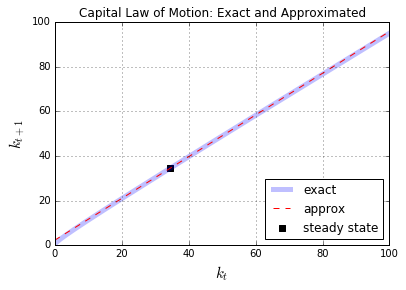

In [11]:
# Create array of values for k[t]
k = np.arange(0,100,0.01)

# Compute k[t+1] exactly using the law of motion for capital per worker
k_forward_exact = s*A*k**alpha + (1-delta)*k

# Compute k[t+1] approximately using the approximation to the law of motion for capital per worker
k_forward_approx = s*A*kstar**alpha + (1-delta)*kstar + (alpha*s*A*kstar**(alpha-1) + 1-delta)*(k-kstar)

# Create figure
fig = plt.figure()

# Plot exact and approximate k[t+1] against for k[t]
ax = fig.add_subplot(1,1,1)
ax.plot(k,k_forward_exact,lw=5,label='exact',alpha=0.25)
ax.plot(k,k_forward_approx,'r--',lw=1,label='approx')
ax.scatter(kstar,kstar,s=40,c='k',marker='s',label='steady state')
ax.legend(loc='lower right',scatterpoints=1)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
ax.set_title('Capital Law of Motion: Exact and Approximated',fontsize=12)
ax.set_xlabel('$k_t$',fontsize=15)
ax.set_ylabel('$k_{t+1}$',fontsize=15)
ax.grid()

The exact law of motion and the approximated law of motion intersect at the steady state and are hardly distinguishable elsewhere. You can see the difference between them only by zooming in on the extreme values.

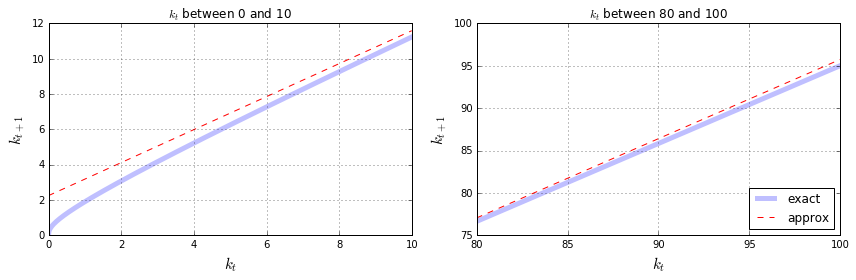

In [12]:
# Create figure
fig = plt.figure(figsize=(12,4))

# Plot exact and approximate k[t+1] against for k[t] between 0 and 10
ax = fig.add_subplot(1,2,1)
ax.plot(k[:1000],k_forward_exact[:1000],lw=5,label='exact',alpha=0.25)
ax.plot(k[:1000],k_forward_approx[:1000],'r--',lw=1,label='approx')
ax.set_title('$k_t$ between 0 and 10',fontsize=12)
ax.set_xlabel('$k_t$',fontsize=15)
ax.set_ylabel('$k_{t+1}$',fontsize=15)
ax.grid()

# Plot exact and approximate k[t+1] against for k[t] between 80 and 100
ax = fig.add_subplot(1,2,2)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.plot(k[-2000:],k_forward_exact[-2000:],lw=5,label='exact',alpha=0.25)
ax.plot(k[-2000:],k_forward_approx[-2000:],'r--',lw=1,label='approx')
ax.legend(loc='lower right',scatterpoints=1)
ax.set_title('$k_t$ between 80 and 100',fontsize=12)
ax.set_xlabel('$k_t$',fontsize=15)
ax.set_ylabel('$k_{t+1}$',fontsize=15)
ax.grid()

fig.tight_layout()

For $k_t$ near zero, the approximated law of motion is greater than the exact one but not by much. For $k_t$ near 100, the two laws of motion are still really close to each other. The point is that we can be confident that in the Solow growth model, capital will tend to converge toward the steady state regardless of its initial value.